# Manipulating site-frequency spectra

fastDFE offers a set of utilities for handling and manipulating site-frequency spectra (SFS) data, especially when there are multiple types. The {class}`~fastdfe.spectrum.Spectra` class is designed to hold and manipulate spectra of multiple types. It provides a number of methods and properties for creating, accessing, and manipulating the spectra data. Usually we would obtain already stratified spectra from {class}`~fastdfe.parser.Parser`, but we can also create them manually.

<Figure size 640x480 with 0 Axes>

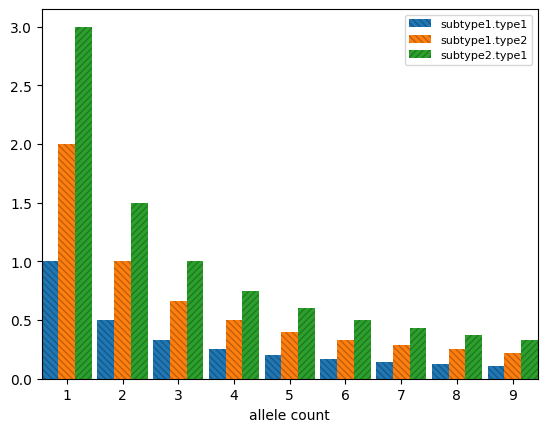

In [1]:
from fastdfe import Spectrum, Spectra

# create spectra with two subtypes and two types
spectra = Spectra.from_spectra({
    "subtype1.type1": Spectrum.standard_kingman(10) * 1,
    "subtype1.type2": Spectrum.standard_kingman(10) * 2,
    "subtype2.type1": Spectrum.standard_kingman(10) * 3,
})

# plot spectra
spectra.plot();

We access types by their index from which we obtain a {class}`~fastdfe.spectrum.Spectrum` object.

<Figure size 640x480 with 0 Axes>

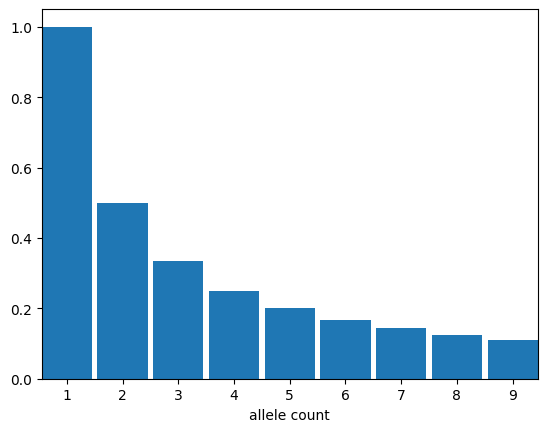

In [2]:
sfs: Spectrum = spectra["subtype1.type1"]

sfs.plot();

We can also use wildcards to access multiple types at once.

<Axes: xlabel='allele count'>

<Figure size 640x480 with 0 Axes>

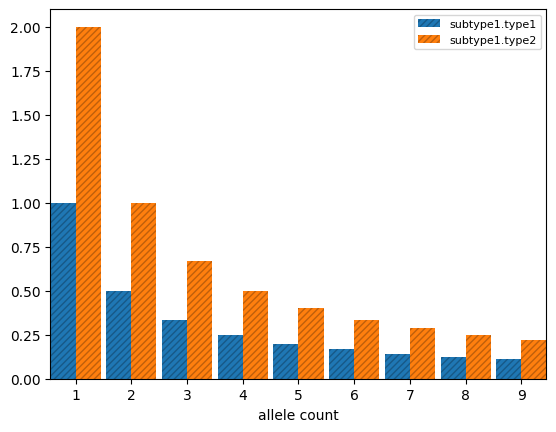

In [3]:
spectra["subtype1.*"].plot()

To get rid of the subtypes, we can merge the spectra over the specified number of groups.

<Axes: xlabel='allele count'>

<Figure size 640x480 with 0 Axes>

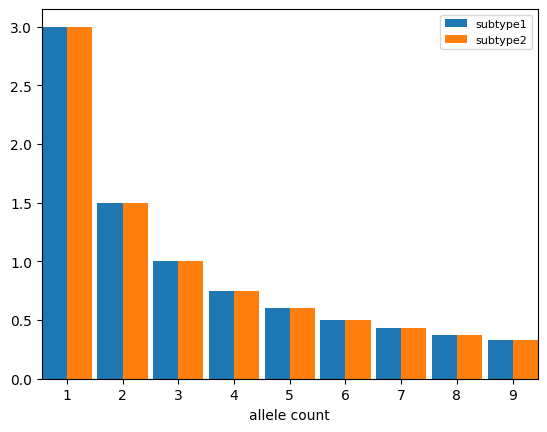

In [4]:
spectra.merge_groups().plot()

Note that we collapsed the types and retained the subtypes. All types for each subtype are thus merged into a single spectrum by adding them upp.

We can also serialize the spectra to a file and restore them from a file.

In [5]:
spectra.to_file("out/spectra.csv")

spectra2 = Spectra.from_file("out/spectra.csv")


Here we prefix the spectra with a string to distinguish them and then combine them into a Spectra object.

<Axes: xlabel='allele count'>

<Figure size 640x480 with 0 Axes>

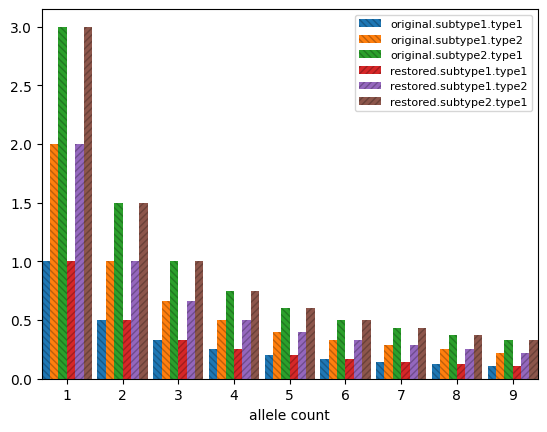

In [6]:
spectra.prefix('original').combine(spectra2.prefix('restored')).plot()

For a complete reference of the available methods and properties, see {class}`~fastdfe.spectrum.Spectra` and {class}`~fastdfe.spectrum.Spectrum`.